In [1]:
##pandas preprocess data
##Numpy numarical python, Array manipulations
##we need these two libries for rading dataset

# Addition of two numbers using ML

## import libries

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('addtwonumbers.csv')

In [4]:
data

,A,B,sum
0,1,1,2
1,2,2,4
2,3,3,6
3,4,4,8
4,5,5,10
5,6,6,12
6,7,7,14
7,8,8,16
8,9,9,18
9,10,10,20


In [5]:
## upside of the dataset called head
## downside the dataset called tail

In [6]:
data.head()

,A,B,sum
0,1,1,2
1,2,2,4
2,3,3,6
3,4,4,8
4,5,5,10


In [7]:
data.tail()

,A,B,sum
5,6,6,12
6,7,7,14
7,8,8,16
8,9,9,18
9,10,10,20


In [8]:
## get no of columns and rows only shape not shape()
data.shape

(10, 3)

In [9]:
## ML steps

## preproccesing - check missing values, null values(null values should be removed)
## EDA - deep idea about data, identify the relationship data(matplotlib)
## scale the values - how is the length, that means the difference between data(special libry sklearn)
## train and test split - 
## Evaluate the model/Algorithm
## deployment


# 1. preprocessing

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int64
 1   B       10 non-null     int64
 2   sum     10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


# 2. Do EDA.

In [11]:
import matplotlib.pyplot as plt

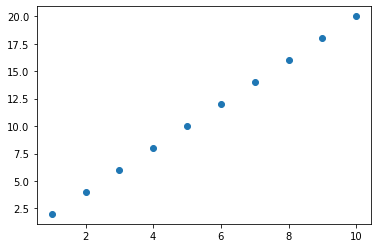

In [12]:
plt.scatter(data['A'],data['sum'])

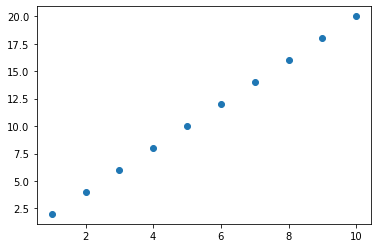

In [13]:
plt.scatter(data['B'],data['sum'])

# 3. Identify the pattern 

In [14]:
# According to EDA proccess the algorithm can be identified 
# This is linear regression

# 4. Store feture mtrix in X and Response in vector y


In [15]:
#X(capital we can store inputs)
#y(simple we can store outputs)

In [16]:
X = data[['A','B']]
y = data['sum']

# 5. Train - Test Split

In [17]:
# we use here sklearn libry
# model_selection should be imported 

In [18]:
from sklearn.model_selection import train_test_split
#train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)


In [19]:
X_train

,A,B
7,8,8
2,3,3
9,10,10
4,5,5
3,4,4
6,7,7


# 6. Import and Train the model

In [20]:
# model should be given liner regression
# It comes from sklearn


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#create a instance(object) of model
model = LinearRegression()

In [23]:
#Train the model
#give the train parameters inside the method
model.fit(X_train,y_train)

LinearRegression()

# Model's prediction performance

In [24]:
# How well our model fitted is checked using the sore() training and testion seperately

model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.fit(X_test,y_test)

LinearRegression()

In [26]:
model.score(X_train,y_train)

1.0

In [27]:
model.score(X_test,y_test)

1.0

# 8. Compare the results

In [28]:
# predict data is saved
y_pred = model.predict(X_test)

In [29]:
y_pred

array([18.,  4., 12.,  2.])

In [30]:

y_test

8    18
1     4
5    12
0     2
Name: sum, dtype: int64

In [31]:
# Compare using data frame
df = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

In [32]:
df

,Actual,Prediction
8,18,18.0
1,4,4.0
5,12,12.0
0,2,2.0


# 9. Prediction on new samples

In [33]:
#Use an array according to a number of features. if two variables 2D array.
model.predict([[27,34]])

array([61.])

In [34]:
model.predict([[127,34]])

array([161.])

In [35]:
# Next we are going to this production
# when it is sent to production we can go 
# we save this dataset called pickel file and also using joblib libry
# the advantage is we donot want to train again and again 

# 10. Save the model using joblib or pickel

In [36]:
import joblib 

In [37]:
# model will be saved according to the name
joblib.dump(model,'model_joblib')

['model_joblib']

In [38]:
#Load model
model = joblib.load('model_joblib')

In [39]:
#check prediction
model.predict([[127,34]])

array([161.])

In [40]:
#before sending production we have to dataset train entirely. that means before creating GUI , before deploy

In [41]:
x = data[['A','B']]
y = data['sum']

In [42]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [43]:
import joblib
joblib.dump(model,'model_joblib')
model = joblib.load('model_joblib')
model.predict([[127,34]])

array([161.])

# 11. GUI

In [44]:
# for GUI tkinter libry 
from tkinter import *

In [45]:
# save 
import joblib

In [46]:
#create instance
master=Tk()

In [47]:
# name title
master.title("Addition of two numbers using ML")

''

In [48]:
label = Label(master, text = "addition of two numbers using ML", bg='black',fg='white').grid(row=0,columnspan=2)

# 12. Applying labels

In [49]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    
    model = joblib.load('model_joblib')
    result = model.predict([[p1,p2]])
    
    Label(master,text='sum is = ').grid(row=4)
    Label(master,text= result).grid(row=3)
    
    print(result)
    
    

Label(master,text="Enter First Number").grid(row=1)
Label(master,text="Enter Second Number").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
Button(master,text="predict",command=show_entry_fields).grid()

mainloop()

[146.]
